## Getting started

We will start by reading and plotting a spectrum from the ESPRESSO spectrograph.

In [69]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [70]:
from actin2 import actin2
actin = actin2.ACTIN()
print(actin.__doc__)

The ACTIN class. Reads fits files and calculates activity indices.

    Attributes:
        ReadSpec (actin2.ReadSpec) : Object that reads spectrum and   
            headers.
        IndTable (actin2.IndTable) : Object containing the 
            indices table.
        ProcessSpec (actin2.ProcessSpec) : Object to process the 
            spectrum.
    


First we are going to use a fits file provided by `actin` in the ``test`` directory.

In [71]:
import os, glob
files = glob.glob(os.path.join(os.pardir, os.pardir, os.pardir, "actin2/test/ESPRESSO", "*_S1D_A.fits"))
files

['../../../actin2/test/ESPRESSO/r.ESPRE.2018-09-03T08:38:21.545_S1D_A.fits']

The class ``actin.ReadSpec`` can read one fits file and identify the spectrum to read it automatically.
We can call the `plot` method to plot the full spectrum. If the file was a 2D spectrum, we could have used the `order` option in the `plot` method to select the order to plot. The option ```show=False``` can be used to produce the plot without calling `plt.show()` so the plot can be used afterwards.

Running ReadSpec
loaded file: ../../../actin2/test/ESPRESSO/r.ESPRE.2018-09-03T08:38:21.545_S1D_A.fits
loaded instr: ESPRESSO
Reading spectrum file
Reading CCF file


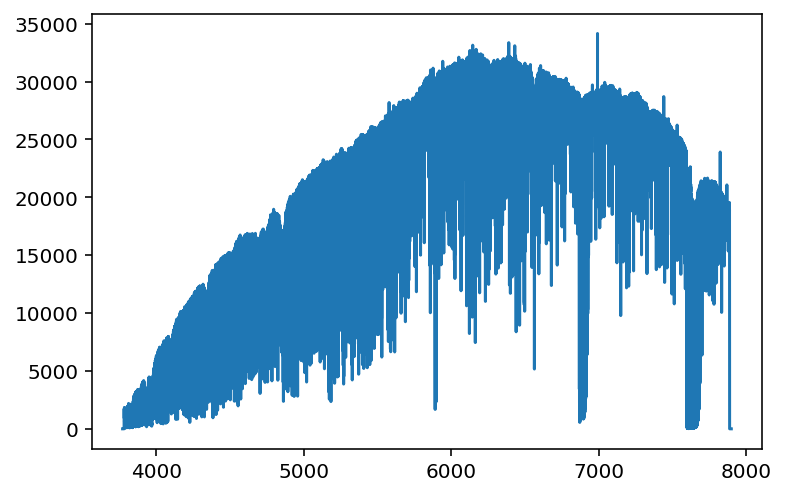

In [72]:
actin.ReadSpec(files[0]).plot(show=True)